## Import libraries

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load data

In [153]:
df = pd.read_csv("winemag-data_first150k.csv") 
del df['Unnamed: 0']
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## What are the best varieties of wine?

How many missing values are there in the variety column?

In [154]:
df['variety'].isnull().sum()

0

No values are missing.

Now let´s group the data by country and let´s see the average rate for each.

In [173]:
def get_top_varieties(country, top_p=10):
    df_var = df.groupby(['country','variety'])['points', 'price'].mean().sort_values(by=['country', 'points'], ascending=False)
    df_var = df_var['points'].unstack(0)
    return df_var[country].dropna().sort_values(ascending=False)[0:top_p]

In [178]:
get_top_varieties('Argentina', 20)

variety
Syrah-Viognier               94.000000
Malbec-Cabernet Franc        92.000000
Malbec Blend                 92.000000
Malbec-Petit Verdot          91.000000
Cabernet Blend               89.750000
Bordeaux-style Red Blend     89.575472
Syrah-Malbec                 89.000000
Nebbiolo                     89.000000
Red Blend                    88.197059
Merlot-Malbec                88.142857
Cabernet-Syrah               88.000000
Merlot-Cabernet Sauvignon    88.000000
Malbec-Merlot                87.680000
Cabernet Franc               87.454545
Malbec-Cabernet Sauvignon    87.413793
Meritage                     87.400000
Cabernet Sauvignon-Shiraz    87.250000
Malbec-Tempranillo           87.142857
Cabernet Sauvignon-Merlot    87.136364
Cabernet Sauvignon-Malbec    87.027027
Name: Argentina, dtype: float64

## How does the prices change with the rates?

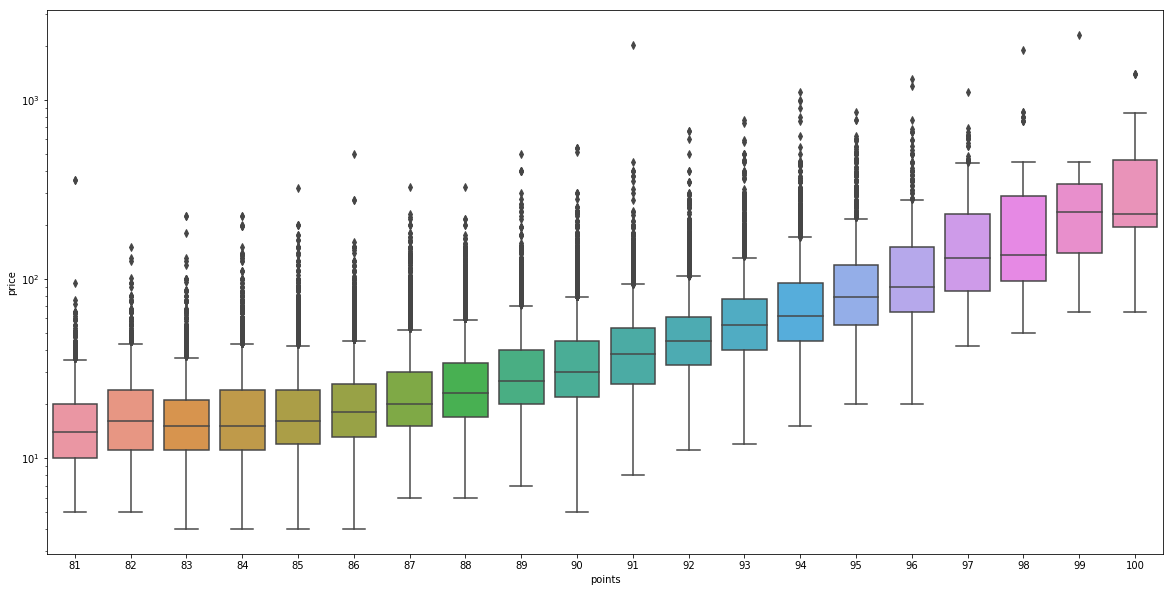

In [128]:
df_s = df[df['points']>80]
sns.boxplot(x=df_s['points'], y=df_s['price'], data=df_s);
plt.yscale('log')

We see that the average price rises for better wines. However, a lot of wines cost more than the average on every rate category.

## Conclusion

France has the highest proportion of wine that are rated above 95 by far followed by US, Germany, Austria, and Italy.